In [160]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "."]).decode("utf8"))

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline
# Any results you write to the current directory are saved as output.

gender_submission.csv
test.csv
titanic.ipynb
train.csv



In [161]:
#load train data and test data
df_train = pd.read_csv("./train.csv")
df_train.info()
df_test = pd.read_csv("./test.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [162]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [163]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [164]:
#drop columns
df_train.drop(["PassengerId", "Name", "Ticket", "Cabin"], inplace=True, axis=1)
df_test.drop(["PassengerId", "Name", "Ticket", "Cabin"], inplace=True, axis=1)

df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [165]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Visualizations

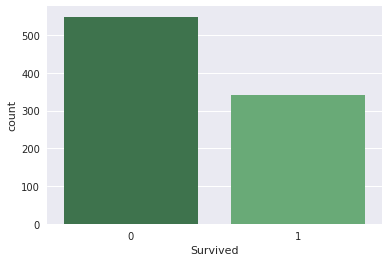

In [166]:
sns.countplot(x="Survived", data=df_train, palette="Greens_d");

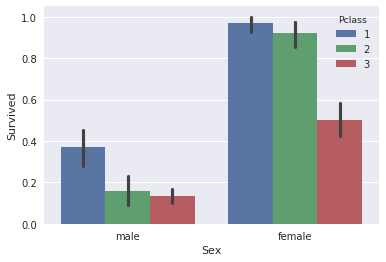

In [167]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df_train);

In [168]:
# Change columns to category
columns = ["Survived", "Pclass", "Sex", "Embarked"]
for col in columns:
    df_train[col] = df_train[col].astype("category")
for col in columns[1:]:
    df_test[col] = df_test[col].astype("category")

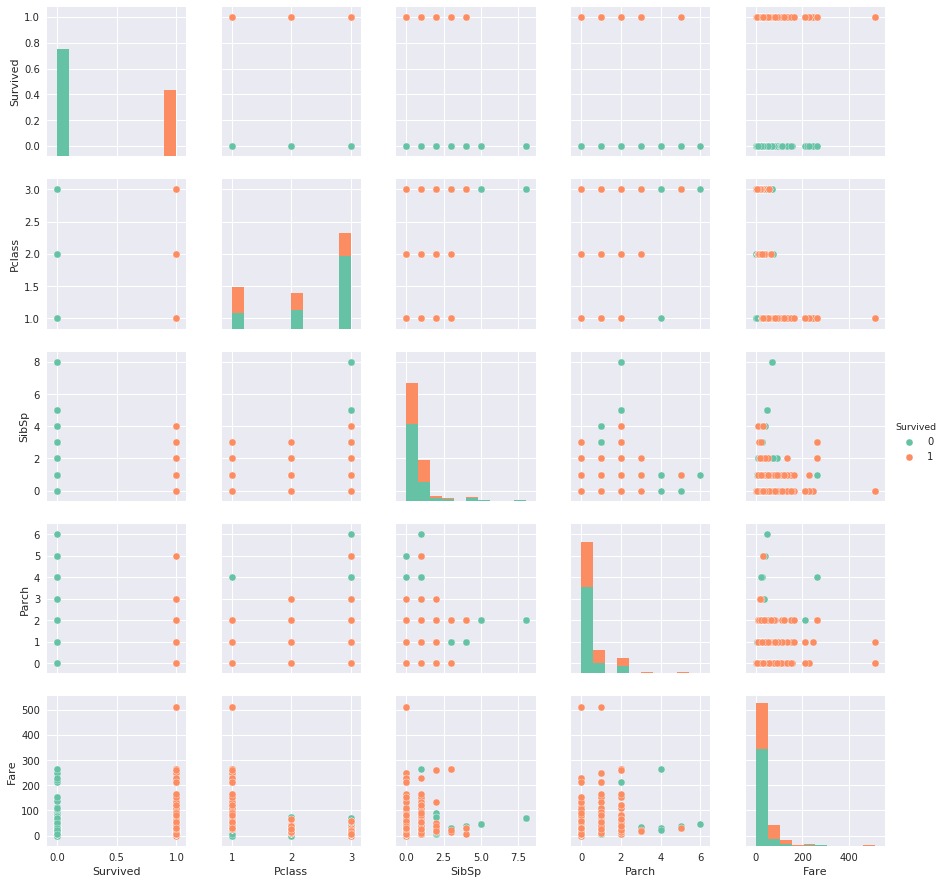

In [169]:
sns.set()
cols = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Fare", "Embarked"]
sns.pairplot(df_train[cols], hue="Survived", size = 2.5, palette="Set2")
plt.show();

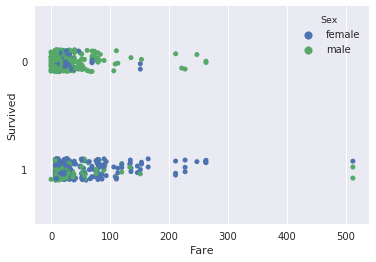

In [170]:
sns.stripplot(x="Fare", y="Survived", hue="Sex", data=df_train, jitter=True);

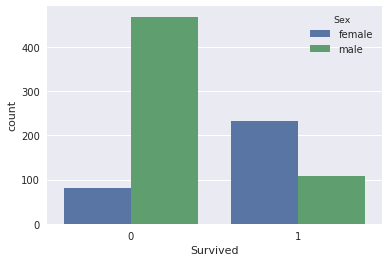

In [171]:
#sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df_train);
sns.countplot(x="Survived", data=df_train, hue="Sex");

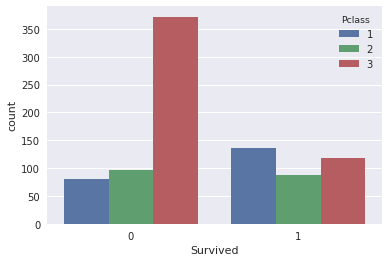

In [172]:
sns.countplot(x="Survived", data=df_train, hue="Pclass");

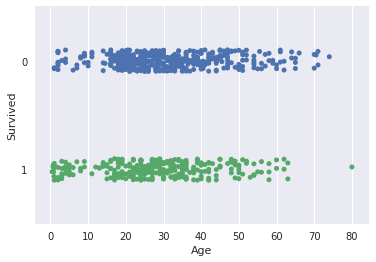

In [173]:
sns.stripplot(x="Age", y="Survived", data=df_train, jitter=True)

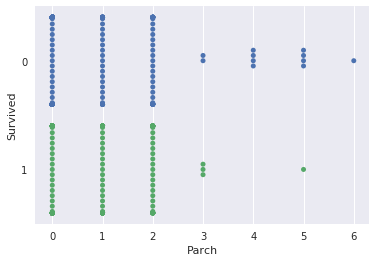

In [174]:
sns.swarmplot(x="Parch", y="Survived", data=df_train)

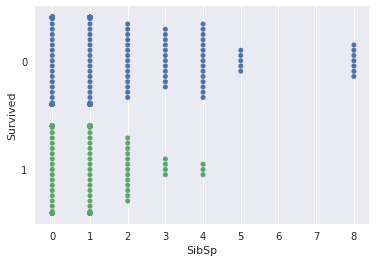

In [175]:
sns.swarmplot(x="SibSp", y="Survived", data=df_train)

# Missing Data

In [176]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000


In [177]:
null_age = df_train.loc[df_train['Age'].isnull()]
null_age_test = df_test.loc[df_test['Age'].isnull()]
null_age.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
31,1,1,female,NaN,1,0,146.5208,C
32,1,3,female,NaN,0,0,7.7500,Q
36,1,3,male,NaN,0,0,7.2292,C
42,0,3,male,NaN,0,0,7.8958,C


In [178]:
grouped = df_train.groupby(["SibSp", "Parch"]).mean()

In [179]:
#grouped.loc[null_age["SibSp"], null_age["Parch"]]
#grouped.loc[[(8, 2), (8, 2)]]["Age"]
df_train.loc[df_train['Age'].isnull(), "Age"] = list(grouped.loc[list(zip(null_age.SibSp, null_age.Parch))]["Age"])
df_train.loc[df_train['Age'].isnull(), "Age"]
df_test.loc[df_test['Age'].isnull(), 'Age'] = list(grouped.loc[list(zip(null_age_test.SibSp, null_age_test.Parch))]["Age"])

In [180]:
df_train.loc[df_train['SibSp'] == 8, 'Age'] = df_train["Age"].mean()
df_test.loc[df_test['SibSp'] == 8, 'Age'] = df_train["Age"].mean()

In [181]:
df_train = df_train.drop(df_train.loc[df_train['Embarked'].isnull()].index)
df_test = df_test.drop(df_test.loc[df_test['Embarked'].isnull()].index)

df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [182]:
df_test[df_test["Age"].isnull()]
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].median())
df_test[df_test["Age"].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


# Normalization

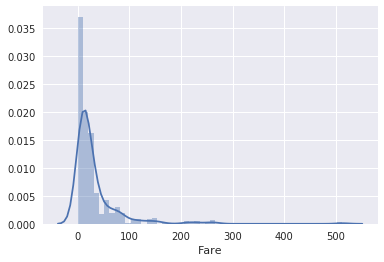

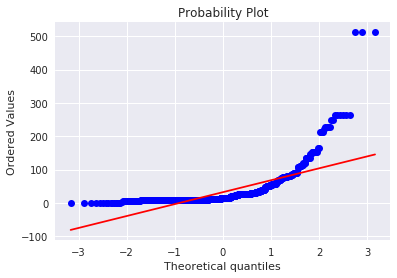

In [183]:
#histogram and normal probability plot
from scipy import stats
sns.distplot(df_train['Fare']);
fig = plt.figure()
res = stats.probplot(df_train['Fare'], plot=plt)

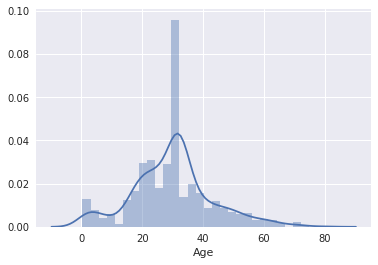

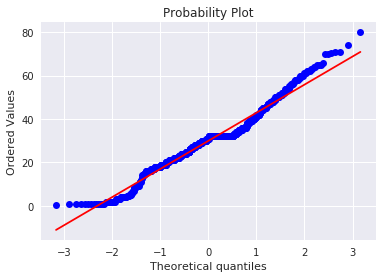

In [184]:
sns.distplot(df_train['Age']);
fig = plt.figure()
res = stats.probplot(df_train['Age'], plot=plt)

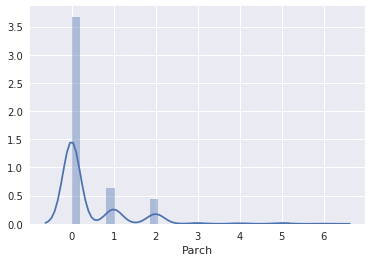

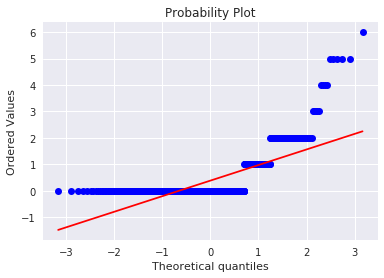

In [185]:
sns.distplot(df_train['Parch']);
fig = plt.figure()
res = stats.probplot(df_train['Parch'], plot=plt)

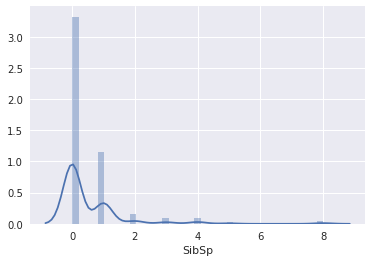

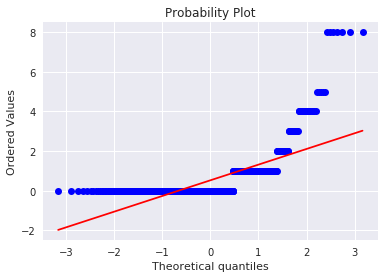

In [186]:
sns.distplot(df_train['SibSp']);
fig = plt.figure()
res = stats.probplot(df_train['SibSp'], plot=plt)

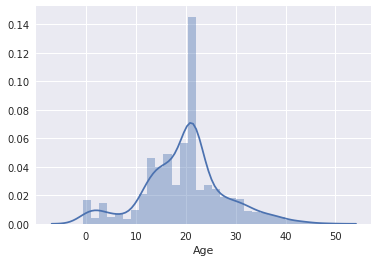

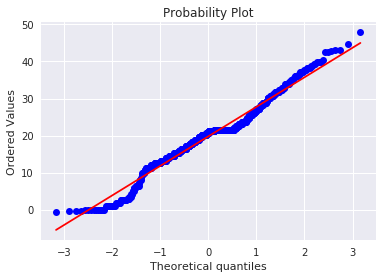

In [187]:
df_train["Age"] = stats.boxcox(df_train['Age'].values)[0]
df_test["Age"] = stats.boxcox(df_test['Age'].values)[0]
sns.distplot(df_train['Age']);
fig = plt.figure()
res = stats.probplot(df_train['Age'], plot=plt)

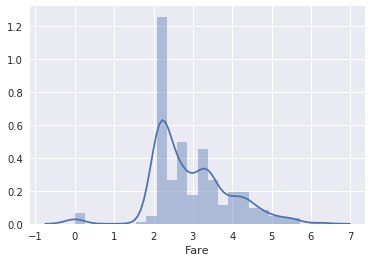

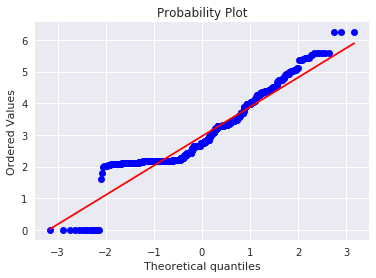

In [188]:
df_train["Fare"] = np.log1p(df_train["Fare"])
df_test["Fare"] = np.log1p(df_test["Fare"])

sns.distplot(df_train['Fare']);
fig = plt.figure()
res = stats.probplot(df_train['Fare'], plot=plt)

# Scaling

In [189]:
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].median())

In [190]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
drop_columns = ["Survived","Pclass", "Sex", "Embarked"]
df_train[df_train.columns.drop(drop_columns)] = sc_X.fit_transform(df_train[df_train.columns.drop(drop_columns)])
df_test[df_test.columns.drop(drop_columns[1:])] = sc_X.transform(df_test[df_test.columns.drop(drop_columns[1:])])

# One hot encoding

In [191]:
df_train = pd.get_dummies(df_train, columns=["Pclass", "Sex", "Embarked"], drop_first=True)
df_test = pd.get_dummies(df_test, columns=["Pclass", "Sex", "Embarked"], drop_first=True)
df_train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,-0.569183,0.431350,-0.474326,-0.877591,0,1,1,0,1
1,1,0.630460,0.431350,-0.474326,1.366380,0,0,0,0,0
2,1,-0.259770,-0.475199,-0.474326,-0.796281,0,1,0,0,1
3,1,0.412409,0.431350,-0.474326,1.066796,0,0,0,0,1
4,0,0.412409,-0.475199,-0.474326,-0.781901,0,1,1,0,1


# Split into train and validation sets

In [192]:
#Split into train,test
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(df_train.iloc[:, 1:],df_train.Survived,test_size=0.25)

# Trying different classifiers
testing classifiers without much tampering

## Logistic Regression

In [193]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print("Train score: ", classifier.score(X_train, y_train))
print("Validation score: ", classifier.score(X_val, y_val))


Train score:  0.807807807808
Validation score:  0.762331838565


# SVC
Improved with scaler

In [194]:
from sklearn.svm import SVC
C = 20
svm_classifier = SVC(C=C, kernel="rbf")
svm_classifier.fit(X_train, y_train)
print("Train score: ", svm_classifier.score(X_train, y_train))
print("Validation score: ", svm_classifier.score(X_val, y_val))

Train score:  0.878378378378
Validation score:  0.757847533632


# Decision Tree

In [195]:
from sklearn.tree import DecisionTreeClassifier
max_depth = 8
classifier = DecisionTreeClassifier(presort=True, max_depth=max_depth)
classifier.fit(X_train,y_train)
print("Train score: ", classifier.score(X_train, y_train))
print("Validation score: ", classifier.score(X_val, y_val))

Train score:  0.914414414414
Validation score:  0.744394618834


# Random Forest

In [196]:
from sklearn.ensemble import RandomForestClassifier
max_depth = 10
n_estimators = 20
classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
classifier.fit(X_train, y_train)
print("Train score: ", classifier.score(X_train, y_train))
print("Validation score: ", classifier.score(X_val, y_val))

Train score:  0.936936936937
Validation score:  0.77130044843


# Cross-Validation
Help finding best parameters for the classifiers

In [197]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
import operator

In [198]:
C_scores = {}
for C in np.arange(0.1, 0.3, 0.01):
    classifier = LogisticRegression(C=C)
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    scores = cross_val_score(classifier, df_train.iloc[:, 1:], df_train.Survived, cv=cv)
    #print ("Scores with C=",C, scores)
    print(C, "Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))
    C_scores[C] = scores.mean()
sorted_scores = sorted(C_scores.items(), key=operator.itemgetter(1))
print (sorted_scores[-5:])
# best C
C = 0.26

0.1 Accuracy: 0.79476 (+/- 0.06238)
0.11 Accuracy: 0.79401 (+/- 0.05504)
0.12 Accuracy: 0.79251 (+/- 0.05637)
0.13 Accuracy: 0.79401 (+/- 0.05254)
0.14 Accuracy: 0.79775 (+/- 0.05102)
0.15 Accuracy: 0.79476 (+/- 0.04794)
0.16 Accuracy: 0.79476 (+/- 0.05067)
0.17 Accuracy: 0.79700 (+/- 0.04887)
0.18 Accuracy: 0.79700 (+/- 0.04887)
0.19 Accuracy: 0.79700 (+/- 0.04794)
0.2 Accuracy: 0.79850 (+/- 0.04529)
0.21 Accuracy: 0.79775 (+/- 0.04761)
0.22 Accuracy: 0.79775 (+/- 0.04761)
0.23 Accuracy: 0.79850 (+/- 0.04529)
0.24 Accuracy: 0.80000 (+/- 0.04752)
0.25 Accuracy: 0.80075 (+/- 0.04771)
0.26 Accuracy: 0.80150 (+/- 0.05275)
0.27 Accuracy: 0.80000 (+/- 0.05267)
0.28 Accuracy: 0.80075 (+/- 0.05305)
0.29 Accuracy: 0.79925 (+/- 0.05496)
[(0.23999999999999994, 0.80000000000000004), (0.26999999999999991, 0.80000000000000004), (0.24999999999999992, 0.80074906367041199), (0.27999999999999992, 0.80074906367041199), (0.2599999999999999, 0.80149812734082393)]


In [199]:
C_scores = {}
for C in range(15,25):
    svm_classifier = SVC(C=C, kernel='rbf')
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    scores = cross_val_score(svm_classifier, df_train.iloc[:, 1:], df_train.Survived, cv=cv)
    #print ("Scores with C=",C, scores)
    print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))
    C_scores[C] = scores.mean()
sorted_scores = sorted(C_scores.items(), key=operator.itemgetter(1))
print (sorted_scores[-5:])
#Best value for C = 15

Accuracy: 0.81348 (+/- 0.04378)
Accuracy: 0.81049 (+/- 0.04559)
Accuracy: 0.81049 (+/- 0.04868)
Accuracy: 0.81049 (+/- 0.04868)
Accuracy: 0.81049 (+/- 0.04868)
Accuracy: 0.81049 (+/- 0.04868)
Accuracy: 0.80674 (+/- 0.04891)
Accuracy: 0.80449 (+/- 0.04699)
Accuracy: 0.80225 (+/- 0.04723)
Accuracy: 0.80225 (+/- 0.04578)
[(17, 0.8104868913857679), (18, 0.8104868913857679), (19, 0.8104868913857679), (20, 0.8104868913857679), (15, 0.8134831460674159)]


In [200]:
depth_scores = {}
for max_depth in range(1,11):
    tree_classifier = DecisionTreeClassifier(max_depth=max_depth)
    cv = ShuffleSplit(n_splits=5, test_size=0.3)
    scores = cross_val_score(tree_classifier, df_train.iloc[:, 1:], df_train.Survived, cv=cv)
    #print "Scores with max_depth=",max_depth, scores
    print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))
    depth_scores[max_depth] = scores.mean()
sorted_scores = sorted(depth_scores.items(), key=operator.itemgetter(1))
print (sorted_scores)
#Best max_depth
max_depth = 8

Accuracy: 0.77678 (+/- 0.01871)
Accuracy: 0.77828 (+/- 0.01976)
Accuracy: 0.80824 (+/- 0.04429)
Accuracy: 0.81348 (+/- 0.03121)
Accuracy: 0.81873 (+/- 0.02202)
Accuracy: 0.82247 (+/- 0.05116)
Accuracy: 0.80375 (+/- 0.02252)
Accuracy: 0.79700 (+/- 0.04195)
Accuracy: 0.78127 (+/- 0.04914)
Accuracy: 0.80075 (+/- 0.05887)
[(1, 0.7767790262172285), (2, 0.77827715355805238), (9, 0.78127340823970037), (8, 0.79700374531835205), (10, 0.80074906367041199), (7, 0.80374531835205987), (3, 0.80823970037453174), (4, 0.81348314606741567), (5, 0.8187265917602996), (6, 0.82247191011235954)]


In [201]:
depth_scores = {}
max_depth = 5
for n_estimators in range(15,30):
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    cv = ShuffleSplit(n_splits=5, test_size=0.3)
    scores = cross_val_score(rf_classifier, df_train.iloc[:,1:], df_train.Survived, cv=cv)
    #print "Scores with n_estimators=",n_estimators, scores
    print(n_estimators, "Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))
    depth_scores[n_estimators] = scores.mean()
sorted_scores = sorted(depth_scores.items(), key=operator.itemgetter(1))
print (sorted_scores[-5:])
#Best n_estimators
n_estimators = 18

15 Accuracy: 0.83820 (+/- 0.01452)
16 Accuracy: 0.82772 (+/- 0.05898)
17 Accuracy: 0.82622 (+/- 0.06793)
18 Accuracy: 0.80375 (+/- 0.05496)
19 Accuracy: 0.82472 (+/- 0.02480)
20 Accuracy: 0.82921 (+/- 0.05288)
21 Accuracy: 0.82172 (+/- 0.02150)
22 Accuracy: 0.82697 (+/- 0.02087)
23 Accuracy: 0.83071 (+/- 0.02974)
24 Accuracy: 0.81798 (+/- 0.02150)
25 Accuracy: 0.83446 (+/- 0.04168)
26 Accuracy: 0.82472 (+/- 0.02738)
27 Accuracy: 0.81948 (+/- 0.03396)
28 Accuracy: 0.81948 (+/- 0.04603)
29 Accuracy: 0.81199 (+/- 0.04378)
[(16, 0.82771535580524347), (20, 0.82921348314606735), (23, 0.83071161048689146), (25, 0.83445692883895128), (15, 0.83820224719101133)]


In [202]:
output_example = pd.read_csv("./gender_submission.csv")

In [204]:
final_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
final_classifier.fit(df_train.iloc[:,1:], df_train.Survived)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=18, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [205]:
predictions = final_classifier.predict(df_test)

In [208]:
len(predictions)

418

In [209]:
test = pd.read_csv("./test.csv")

In [211]:
output_example["PassengerId"] = test["PassengerId"]

In [213]:
output_example["Survived"] = predictions

In [217]:
output_example.to_csv("predictions.csv", index=False)